In [21]:
import cv2
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D,AveragePooling2D
from google.colab.patches import cv2_imshow

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
train_path="/content/drive/MyDrive/Mini_Dataset/train"
test_path="/content/drive/MyDrive/Mini_Dataset/validation"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [24]:
print(class_names)
print(class_names_test)

['notes', 'non-notes']
['notes', 'non-notes']


In [25]:
train_datagen = ImageDataGenerator(zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15)
test_datagen = ImageDataGenerator()

In [26]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Mini_Dataset/train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Mini_Dataset/validation",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 2003 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [27]:
# from keras.models.cloning import InputLayer
def VGG16():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
  model.add(Flatten(name='flatten'))
  model.add(Dense(256, activation='relu', name='fc1'))
  model.add(Dense(128, activation='relu', name='fc2'))
  model.add(Dense(1, activation='sigmoid', name='output'))

  return model

In [28]:
model=VGG16()

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [30]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [31]:
Vgg16.load_weights("/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [32]:
for layer in Vgg16.layers:
    layer.trainable = False

In [33]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc3d019c6a0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331a20190> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dc3d0a9e380> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc36a97a9e0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331a23580> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dc36a97b040> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331a23460> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331aee020> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331aed630> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dc331a238e0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331aef520> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331aef3a0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7dc331aeff70> False
<keras.layers.poo

In [37]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [38]:
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)
mc = ModelCheckpoint('/content/gdrive/My Drive/mini_project.h5', monitor='val_accuracy', save_best_only=True)

In [39]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=30,callbacks=[mc,es])

<ipython-input-39-e7079e7a9dc0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_generator,validation_data=test_generator,epochs=30,callbacks=[mc,es])


Epoch 1/30
63/63 [==============================] - 172s 3s/step - loss: 0.3185 - accuracy: 0.9466 - val_loss: 0.0399 - val_accuracy: 0.9911
Epoch 2/30
63/63 [==============================] - 177s 3s/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0431 - val_accuracy: 0.9911
Epoch 3/30
63/63 [==============================] - 189s 3s/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0418 - val_accuracy: 0.9900
Epoch 4/30
63/63 [==============================] - 183s 3s/step - loss: 0.0076 - accuracy: 0.9965 - val_loss: 0.0308 - val_accuracy: 0.9933
Epoch 5/30
63/63 [==============================] - 172s 3s/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0344 - val_accuracy: 0.9944
Epoch 6/30
63/63 [==============================] - 175s 3s/step - loss: 0.0073 - accuracy: 0.9970 - val_loss: 0.0344 - val_accuracy: 0.9933
Epoch 7/30
63/63 [==============================] - 178s 3s/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0320 - val_accuracy: 0.9933
Epoch 8/30
63

In [40]:
model.save('mini_project.h5')

In [41]:
model.load_weights("/content/gdrive/My Drive/mini_project.h5")

In [42]:
model.evaluate_generator(test_generator)

<ipython-input-42-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.03437664359807968, 0.9944444298744202]

In [43]:
model.predict(test_generator)

29/29 [==============================] - 41s 1s/step


array([[9.69395175e-25],
       [1.22821807e-19],
       [8.11324696e-30],
       [9.27584002e-15],
       [8.29327329e-10],
       [5.77482904e-24],
       [2.79947235e-14],
       [7.13427312e-34],
       [9.39136200e-18],
       [2.63425906e-36],
       [4.53989923e-01],
       [3.76462757e-23],
       [1.13148744e-19],
       [3.15561495e-26],
       [3.37582215e-33],
       [1.49199609e-17],
       [5.08810105e-09],
       [7.61583857e-14],
       [6.18342270e-24],
       [1.82985806e-19],
       [2.23434950e-17],
       [1.47339638e-21],
       [1.23118515e-15],
       [4.26046459e-24],
       [1.13790987e-36],
       [2.30649719e-18],
       [1.97700481e-16],
       [2.42358595e-07],
       [1.27171830e-07],
       [5.20452388e-12],
       [3.46842695e-24],
       [4.91525127e-29],
       [4.86755126e-17],
       [1.98775997e-29],
       [0.00000000e+00],
       [4.56324915e-06],
       [3.60111280e-14],
       [0.00000000e+00],
       [8.62270474e-17],
       [1.68455546e-26],


In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
num_of_train_samples = 2003
num_of_test_samples = 900
batch_size = 32
Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)

y_pred = np.argmax(Y_pred, axis=1)
print(confusion_matrix(test_generator.classes, y_pred))
print('Confusion Matrix')
print('Classification Report')
target_names = ['non-notes', 'Notes']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

<ipython-input-44-1c7b5e47f730>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)


[[450   0]
 [450   0]]
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

   non-notes       0.50      1.00      0.67       450
       Notes       0.00      0.00      0.00       450

    accuracy                           0.50       900
   macro avg       0.25      0.50      0.33       900
weighted avg       0.25      0.50      0.33       900



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from keras.models import model_from_json

In [46]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/model.json","w") as json_file:
  json_file.write(model_json)

In [56]:
def predict(image_path):
    #Load the Model from Json File
    json_file = open('/content/gdrive/My Drive/model.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/gdrive/My Drive/mini_project.h5")
    #Compile the model
    opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    cv2_imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    if (preds<=0.5):
        print("Predicted Label:non-notes")
    else:
        print("Predicted Label:Notes")

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


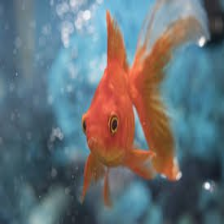

1/1 [==============================] - 0s 154ms/step
Predicted Label:non-notes


In [57]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Non notes/0f64464b3d.jpg')

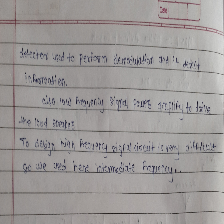

1/1 [==============================] - 0s 159ms/step
Predicted Label:Notes


In [58]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Notes/20220509_153822.jpg')

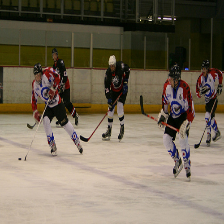

1/1 [==============================] - 0s 164ms/step
Predicted Label:non-notes


In [59]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Non notes/097ec13396d0593ddd00e360b7375b8f.jpeg')

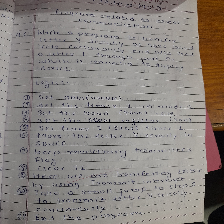

1/1 [==============================] - 0s 154ms/step
Predicted Label:Notes


In [60]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Notes/20220518_143536.jpg')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


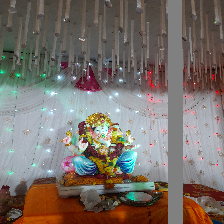

1/1 [==============================] - 0s 206ms/step
Predicted Label:non-notes


In [62]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Non notes/20220831_213200.jpg')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


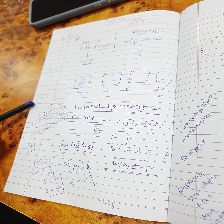

1/1 [==============================] - 0s 163ms/step
Predicted Label:Notes


In [66]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Notes/20230130_150858.jpg')

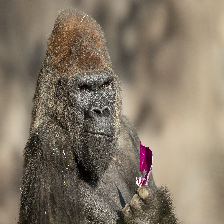

1/1 [==============================] - 0s 167ms/step
Predicted Label:non-notes


In [63]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Non notes/2d73838c27.jpg')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


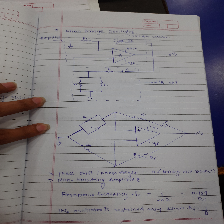

1/1 [==============================] - 0s 185ms/step
Predicted Label:Notes


In [67]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Notes/20230214_125827.jpg')

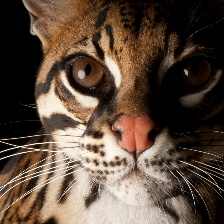

1/1 [==============================] - 0s 153ms/step
Predicted Label:non-notes


In [64]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Non notes/4 (5).jpg')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


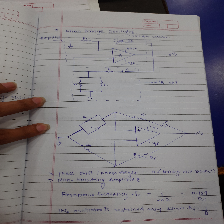

1/1 [==============================] - 0s 146ms/step
Predicted Label:Notes


In [68]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Notes/20230214_125827.jpg')

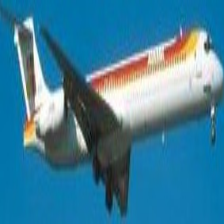

1/1 [==============================] - 0s 158ms/step
Predicted Label:non-notes


In [65]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Non notes/airplane_0713.jpg')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


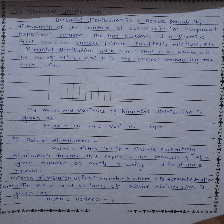

1/1 [==============================] - 0s 193ms/step
Predicted Label:Notes


In [69]:
predict('/content/drive/MyDrive/Mini_Dataset/test/Notes/20220901_220939.jpg')